<a href="https://colab.research.google.com/github/deepak4728/AiEnsured_Intern_Project/blob/main/Veggies_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Vegetable Image Classification**

* Engineered vegetable image classification models using a custom CNN, and ResNet50 with transfer learning in both TensorFlow and PyTorch.
* Classified over 18,000 images, achieving 93.5% (CNN), X% (TensorFlow ResNet50), and Y% (PyTorch ResNet50) accuracy.
* Applied transfer learning, fine-tuning, and optimized preprocessing pipelines to maximize model performance.

----

This project implements a vegetable image classification model using TensorFlow and PyTorch. The goal is to classify images of 15 different vegetables.

## Dataset

The dataset used for this project is the "Vegetable Image Dataset" from Kaggle. It contains images of 15 different types of vegetables, split into training, validation, and test sets.

- **Kaggle Dataset Link:** [https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

## Project Structure

The notebook is structured as follows:

1.  **Imports and Dataset Fetch:** Imports necessary libraries and downloads the dataset using `kagglehub`.
2.  **Utility Functions:** Contains helper functions for loading data, plotting training history, and plotting confusion matrices.
3.  **Load Dataset:** Loads the dataset into TensorFlow `tf.data.Dataset` objects.
4.  **Dataset Preview:** Displays sample images from each class in the dataset.
5.  **Custom Model Training using TensorFlow:** Defines and trains a custom Convolutional Neural Network (CNN) model using TensorFlow.
6.  **Plots:** Visualizes the training history and confusion matrices for the custom TensorFlow model.
7.  **Predictions:** Includes a function for making predictions on individual images using the trained TensorFlow model and demonstrates its usage.
8.  **ResNet50 Model Implementation using Tensorflow:** Defines and trains a ResNet50 model using TensorFlow for transfer learning.
9. **ResNet50 using PyTorch:** Implements and trains a ResNet50 model using PyTorch.

## Models Implemented

This project explores vegetable image classification using three different approaches:

1.  **Custom CNN Model (TensorFlow):** A simple Convolutional Neural Network built from scratch using TensorFlow. The architecture consists of several convolutional layers with ReLU activation and batch normalization, followed by max pooling layers. The flattened output is then passed through dense layers with L2 regularization and dropout for classification.
2.  **ResNet50 (TensorFlow):** This approach utilizes the pre-trained ResNet50 model from Keras Applications for transfer learning. The convolutional base of ResNet50 is used, and new dense layers are added on top for classification. The layers of the ResNet50 model are trained to fine-tune the model for this specific dataset.
3.  **ResNet50 (PyTorch):** This implementation uses the pre-trained ResNet50 model available in PyTorch's `torchvision.models`. Similar to the TensorFlow transfer learning approach, the final fully connected layer is replaced to match the number of vegetable classes. The model is then trained on the dataset using PyTorch's training loop.

## Getting Started

### Prerequisites

-   Python 3.6+
-   TensorFlow
-   PyTorch
-   Kagglehub
-   Numpy
-   Matplotlib
-   Scikit-learn
-   Seaborn
-   Pillow

You can install the required packages using pip:

##**Imports and Dataset Fetch**

**Drive Connect**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 534M/534M [00:26<00:00, 21.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/misrakahmed/vegetable-image-dataset/versions/1


In [ ]:
import random
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dense, SpatialDropout2D, Dropout


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Constants**

In [ ]:
Veggies_count = 15
target_size = (128, 128)


In [ ]:
base_dir = os.path.join(path, 'Vegetable Images')
print(base_dir)
train_dir = os.path.join(base_dir, 'train')
print(train_dir)

/root/.cache/kagglehub/datasets/misrakahmed/vegetable-image-dataset/versions/1/Vegetable Images
/root/.cache/kagglehub/datasets/misrakahmed/vegetable-image-dataset/versions/1/Vegetable Images/train


##**Utility Functions**

In [ ]:
def load_vegetable_datasets(base_dir, img_size=target_size, batch_size=32):

    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')

    # Define a normalization layer
    normalization_layer = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',  # use 'categorical' if you want one-hot encoding
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        val_dir,
        labels='inferred',
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )

    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=False
    )

    # Get class names before applying map
    class_names = train_ds.class_names

    # Apply normalization to the datasets
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
    test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


    return train_ds, val_ds, test_ds, class_names

In [ ]:
def plot_training_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if val_acc:
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if val_loss:
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(model, test_ds, class_names):

    # Get the true labels and predicted labels for the test set
    test_labels = np.concatenate([y for x, y in test_ds], axis=0)
    predictions = model.predict(test_ds)

    # Apply softmax to get probabilities and then get the predicted class
    predicted_labels = np.argmax(tf.nn.softmax(predictions, axis=1), axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(test_labels, predicted_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

##**Load Dataset**

In [ ]:
train_ds, val_ds, test_ds, class_names = load_vegetable_datasets(base_dir)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


##**Dataset Preview**

Found 15 classes: ['Potato', 'Bean', 'Cabbage', 'Bottle_Gourd', 'Bitter_Gourd', 'Cucumber', 'Brinjal', 'Radish', 'Papaya', 'Tomato', 'Broccoli', 'Cauliflower', 'Pumpkin', 'Capsicum', 'Carrot']


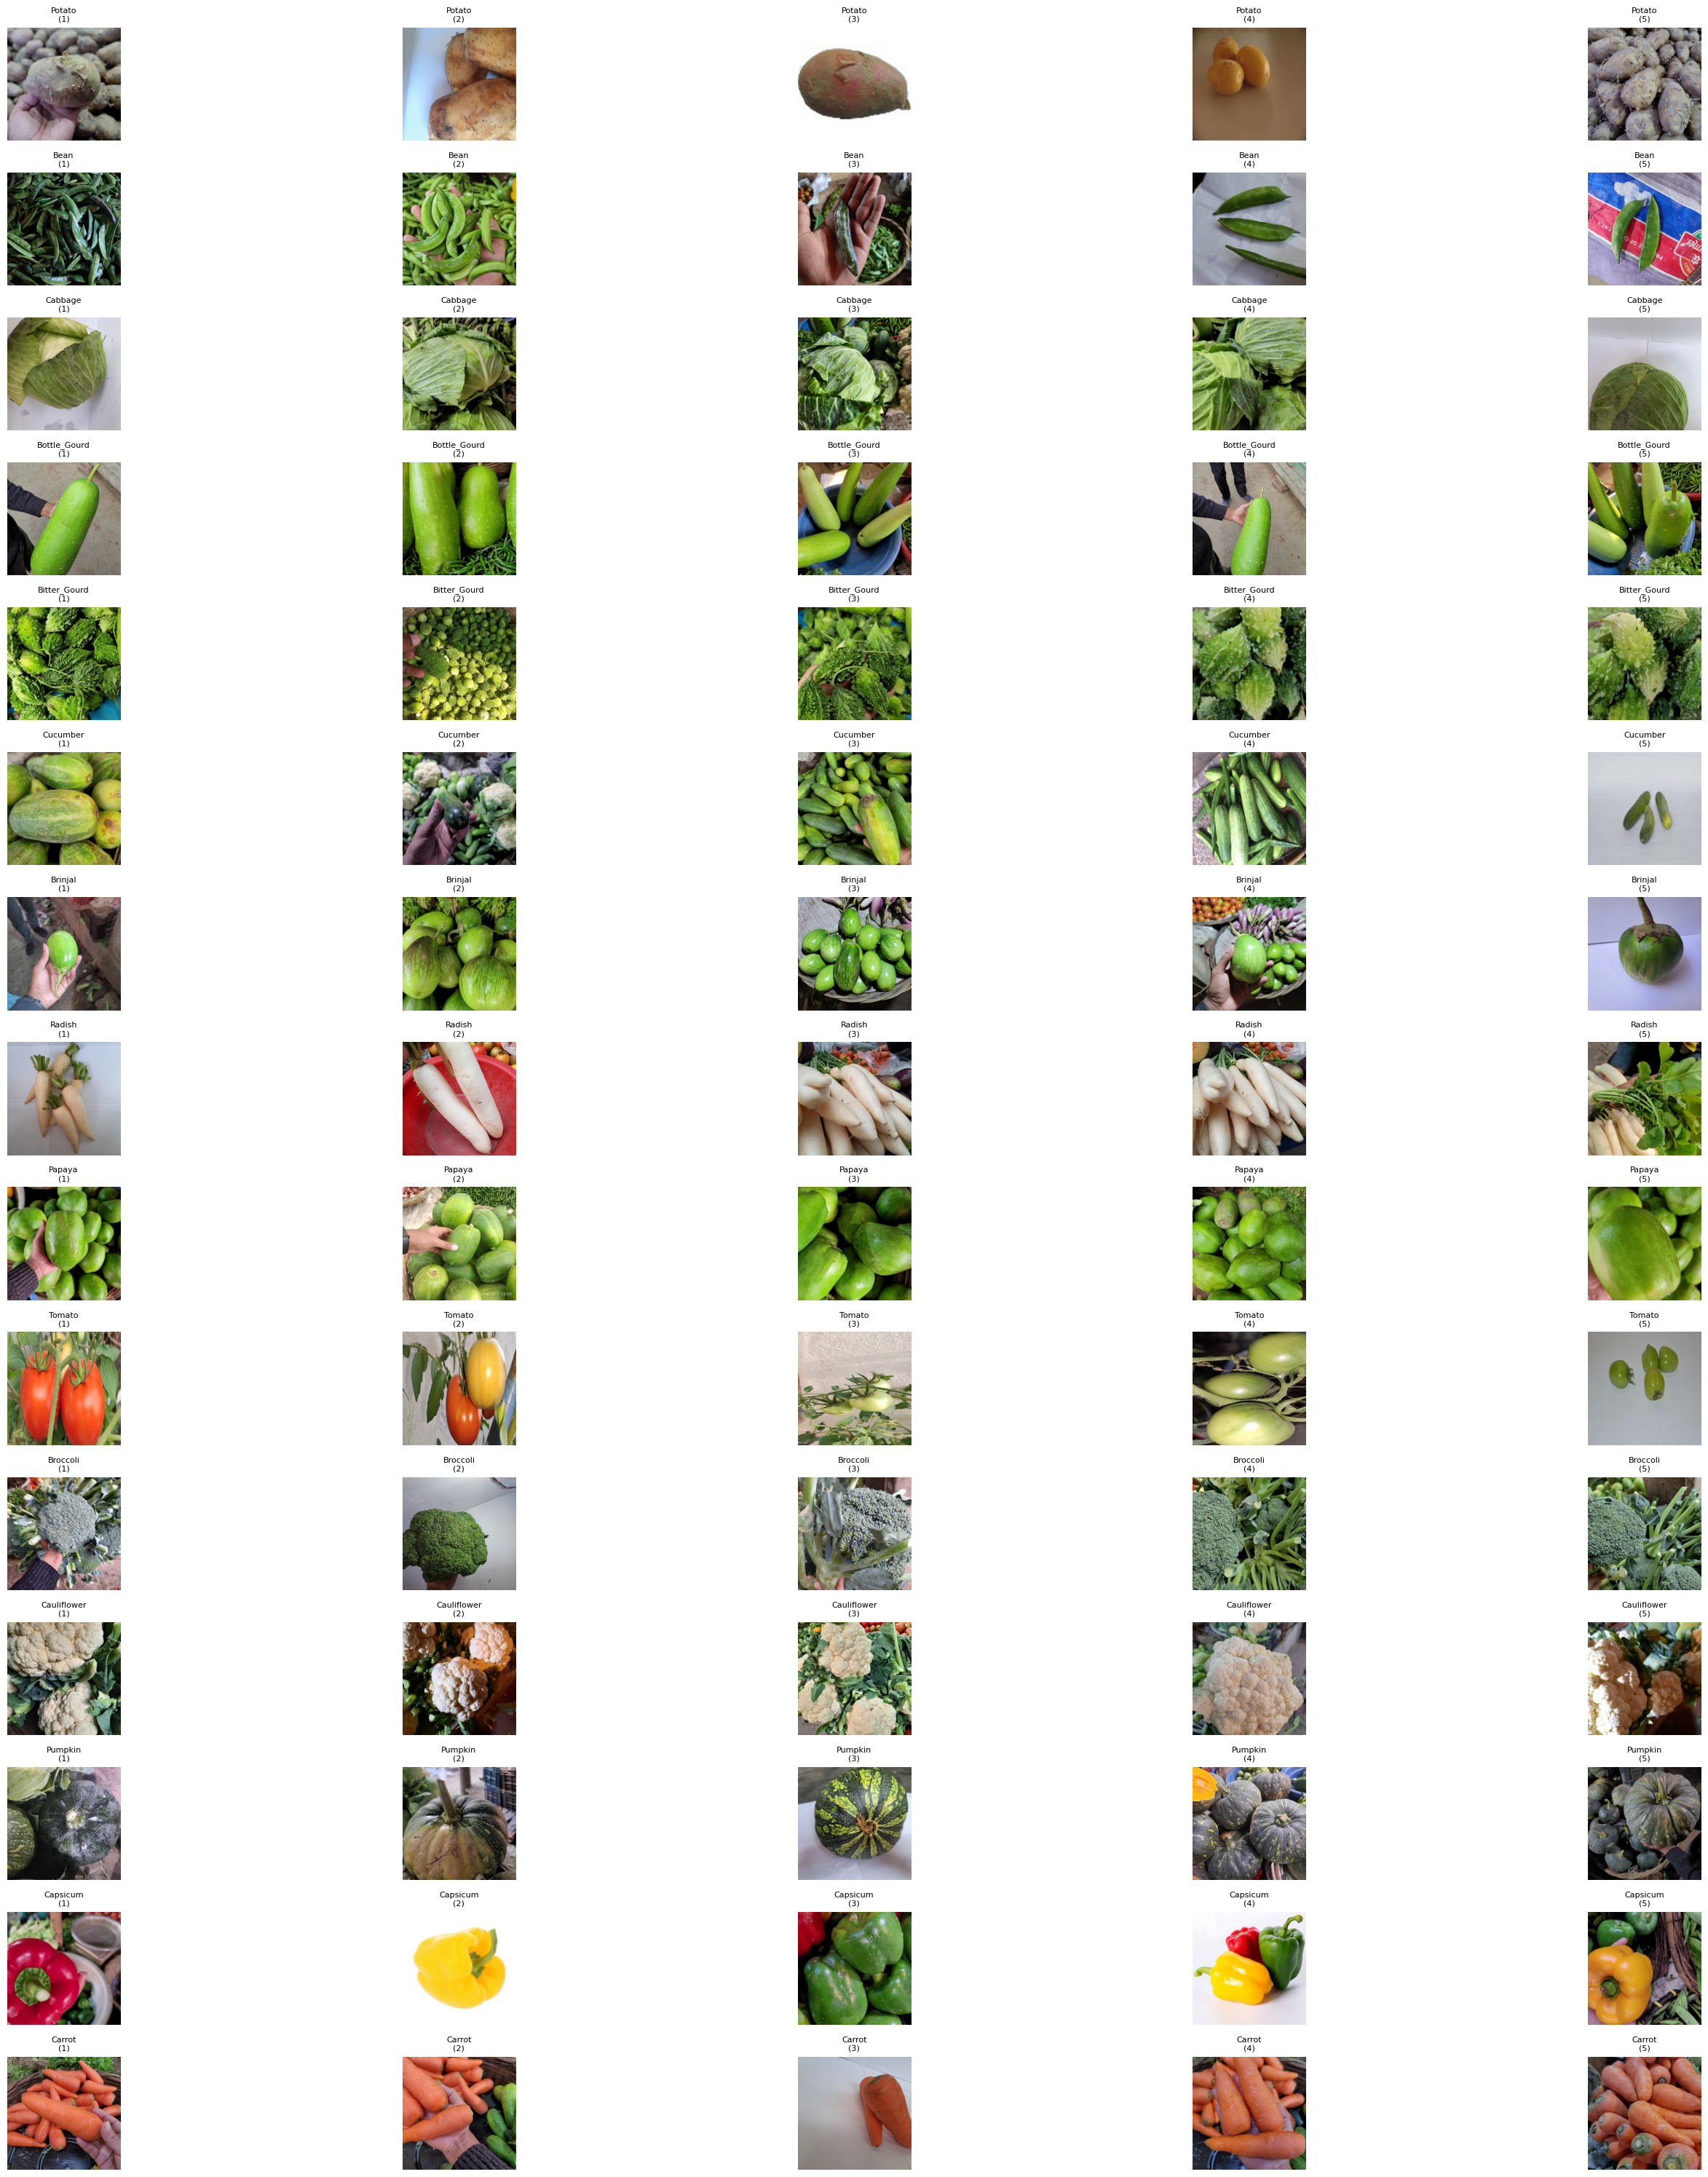

In [ ]:
def display_image_previews(data_dir):
    """
    Displays a preview of 4-5 images from each class in the dataset.

    Args:
        data_dir (str): Path to the root directory of the dataset.
    """
    class_names = os.listdir(data_dir)
    print(f"Found {len(class_names)} classes: {class_names}")

    plt.figure(figsize=(30, 30)) # Increased figure size
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('png', 'jpg', 'jpeg'))]
            # Select up to 5 random images
            preview_images = random.sample(images, min(len(images), 5))

            for j, img_path in enumerate(preview_images):
                plt.subplot(len(class_names), 5, i * 5 + j + 1)
                img = plt.imread(img_path)
                plt.imshow(img)
                plt.title(f"{class_name}\n({j+1})", fontsize=8)
                plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
display_image_previews(train_dir)

#**Custom Model Training using TensorFlow**

##**Model Architecture**

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

model = tf.keras.Sequential([

    Input((target_size[0], target_size[1], 3)),
    # data_augmentation,

    Conv2D(4, (3, 3), activation='relu', name='Conv2D_1', padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    # SpatialDropout2D(0.2),
    MaxPooling2D((2, 2)),

    Conv2D(8, (3, 3), activation='relu', name='Conv2D_2', padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    # SpatialDropout2D(0.2),
    MaxPooling2D((2, 2)),

    Conv2D(16, (3, 3), activation='relu', name='Conv2D_3', padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    # SpatialDropout2D(0.3),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Dropout(0.3),
    Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Dropout(0.3),
    Dense(Veggies_count, activation='linear', name='output', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001))

])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 128, 128, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 64, 64, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 15)             │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,575 (521.78 KB)

 Trainable params: 133,519 (521.56 KB)

 Non-trainable params: 56 (224.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.3218 - loss: 2.3342 - val_accuracy: 0.6440 - val_loss: 1.4433
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7361 - loss: 1.0558 - val_accuracy: 0.8093 - val_loss: 0.8566
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8545 - loss: 0.6874 - val_accuracy: 0.8603 - val_loss: 0.7231
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9093 - loss: 0.5076 - val_accuracy: 0.8477 - val_loss: 0.7469
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9429 - loss: 0.4074 - val_accuracy: 0.8633 - val_loss: 0.6801
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9535 - loss: 0.3734 - val_accuracy: 0.9023 - val_loss: 0.6224
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9662 - loss: 0.3366 - val_accuracy: 0.8810 - val_loss: 0.6862
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9696 - loss: 0.3252 - 

In [ ]:
model.save('/content/drive/MyDrive/AIEnsured/vegetable_model_128x128.keras')

##**Plots**

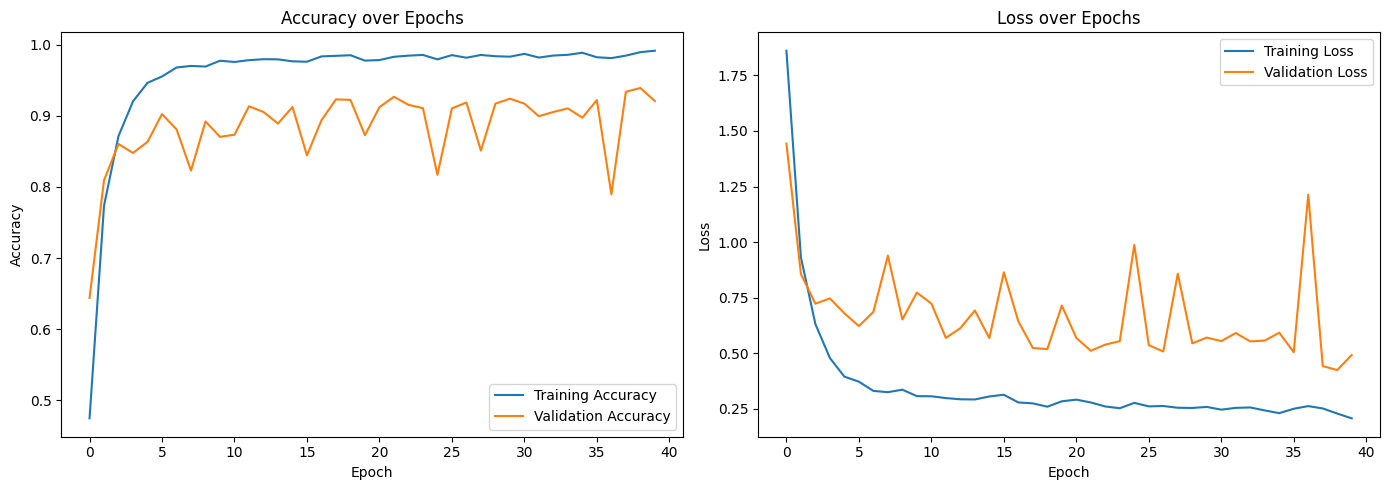

In [ ]:
plot_training_history(history) #128x128 image size model plot

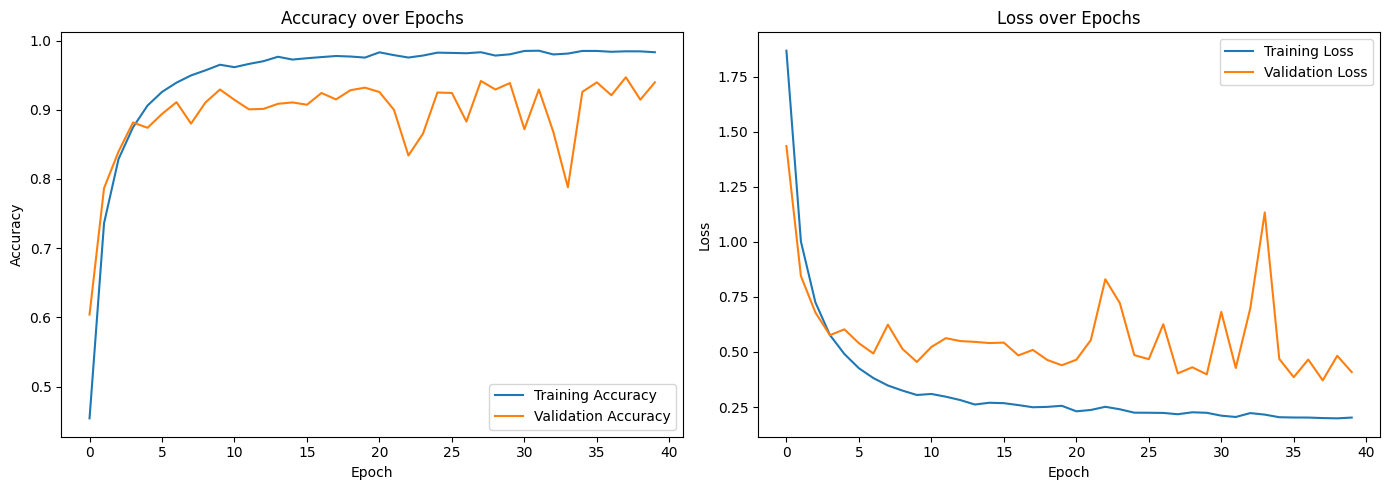

In [ ]:
plot_training_history(history) #previous 64x64 size plot

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


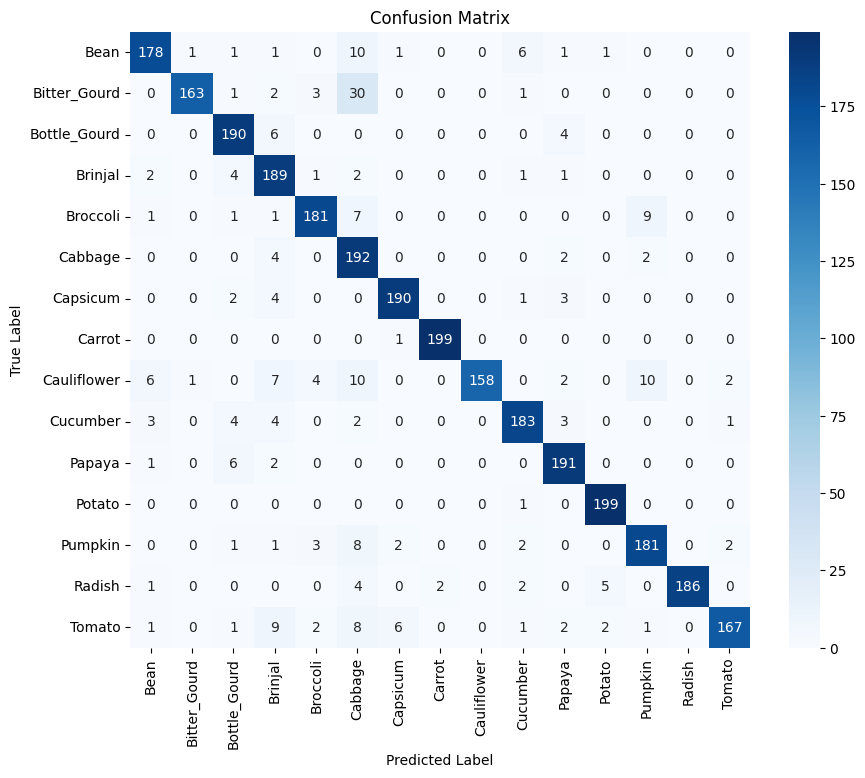

In [ ]:
plot_confusion_matrix(model, test_ds, class_names)

In [ ]:
print(class_names)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


##**Predictions**

In [ ]:
def predict_vegetable(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    print(img_array.shape)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    print(img_array.shape)
    return model.predict(img_array)

In [ ]:
model=load_model('/content/drive/MyDrive/AIEnsured/vegetable_model_128x128.keras')

In [ ]:
pred = predict_vegetable(model, "/content/download.jpeg")

(128, 128, 3)
(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


In [ ]:
pred = tf.nn.softmax(pred, axis=1)
print(pred)
a=np.argmax(pred)
print(class_names[a])

tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 15), dtype=float32)
Brinjal


In [ ]:
# Get a batch of images and labels from the training dataset
for images, labels in val_ds.take(1):
    break

# Make predictions on the batch
predictions = model.predict(images)

# Get the predicted class indices
predicted_indices = np.argmax(tf.nn.softmax(predictions), axis=1)

# Compare true and predicted class names for the batch
print("True Class Name | Predicted Class Name")
print("---------------------------------------")
for i in range(images.shape[0]):
    true_class_name = class_names[labels[i]]
    predicted_class_name = class_names[predicted_indices[i]]
    print(f"{true_class_name:<15} | {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
True Class Name | Predicted Class Name
---------------------------------------
Capsicum        | Capsicum
Pumpkin         | Pumpkin
Cucumber        | Cucumber
Carrot          | Carrot
Bottle_Gourd    | Bottle_Gourd
Bean            | Bean
Potato          | Potato
Papaya          | Papaya
Cabbage         | Cabbage
Cabbage         | Cabbage
Bean            | Bean
Pumpkin         | Pumpkin
Brinjal         | Brinjal
Cauliflower     | Cauliflower
Bean            | Bean
Tomato          | Tomato
Bottle_Gourd    | Bottle_Gourd
Papaya          | Papaya
Bean            | Bean
Tomato          | Tomato
Cabbage         | Cabbage
Capsicum        | Capsicum
Bitter_Gourd    | Bitter_Gourd
Radish          | Radish
Potato          | Potato
Cabbage         | Cabbage
Broccoli        | Pumpkin
Cabbage         | Cabbage
Bottle_Gourd    | Brinjal
Bottle_Gourd    | Bottle_Gourd
Papaya          | Bottle_Gourd
Papaya          | Papaya


#**ResNet50 Model Implementation using Tensorflow**

##**Model Architecure**

In [ ]:
def build_resnet50_model(input_shape, num_classes):

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # for layer in base_model.layers:
    #     layer.trainable = False

    x = base_model.output
    x = Flatten()(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(0.005))(x)
    x = Dropout(0.45)(x)

    x = Dense(256, activation='relu', kernel_regularizer=l2(0.005))(x)
    x = Dropout(0.55)(x)


    predictions = Dense(num_classes, activation='linear')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

    return model

In [ ]:
resnet_model = build_resnet50_model(input_shape=(target_size[0], target_size[1], 3), num_classes=Veggies_count)
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 27,819,023 (106.12 MB)

 Trainable params: 27,765,903 (105.92 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
resnet_model = build_resnet50_model(input_shape=(target_size[0], target_size[1], 3), num_classes=Veggies_count)

# Train the ResNet50 model
history_resnet = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 195ms/step - accuracy: 0.3831 - loss: 4.0568 - val_accuracy: 0.0667 - val_loss: 3.8267
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.7071 - loss: 1.9839 - val_accuracy: 0.4717 - val_loss: 2.8915
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.8500 - loss: 1.2828 - val_accuracy: 0.2010 - val_loss: 275.5604
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 132ms/step - accuracy: 0.8498 - loss: 1.1004 - val_accuracy: 0.7080 - val_loss: 2.2308
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.8956 - loss: 0.8872 - val_accuracy: 0.9083 - val_loss: 0.9643
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.9333 - loss: 0.7485 - val_accuracy: 0.7797 - val_loss: 2.0156
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 137ms/step - accuracy: 0.9441 - loss: 0.6402 - val_accuracy: 0.8920 - val_loss: 0.8000
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.9609 - loss

In [ ]:
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_ds)
print(f"\nResNet50 Test Accuracy: {test_accuracy_resnet:.4f}")
print(f"ResNet50 Test Loss: {test_loss_resnet:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9519 - loss: 0.5713

ResNet50 Test Accuracy: 0.9427
ResNet50 Test Loss: 0.6517


In [ ]:
resnet_model.save('/content/drive/MyDrive/AIEnsured/vegetable_model_resnet_tf_128x128.keras')

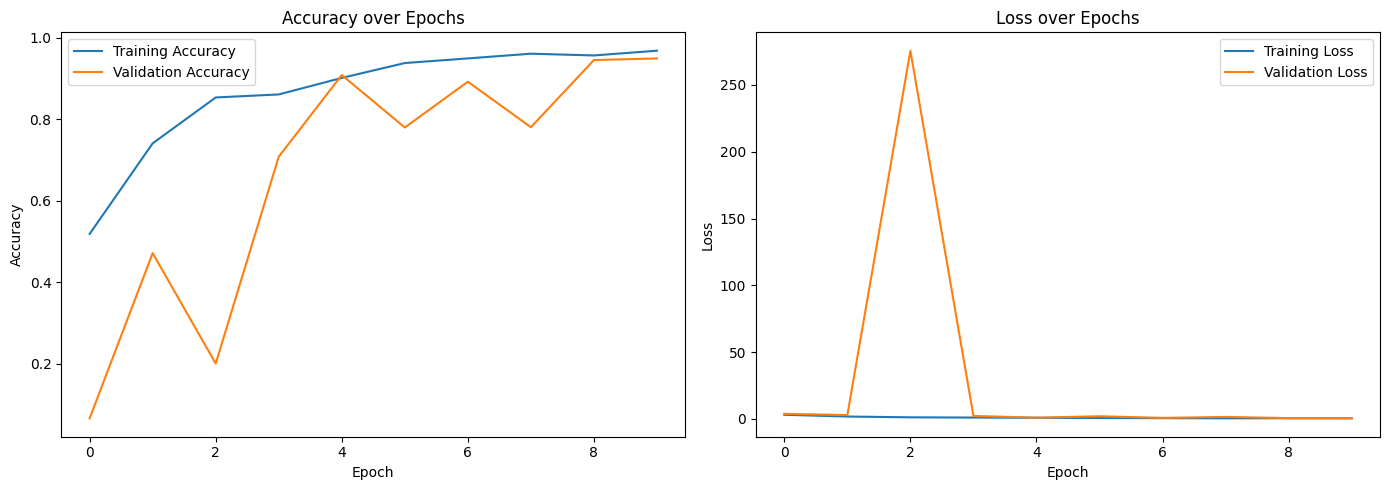

In [ ]:
plot_training_history(history_resnet)

94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step


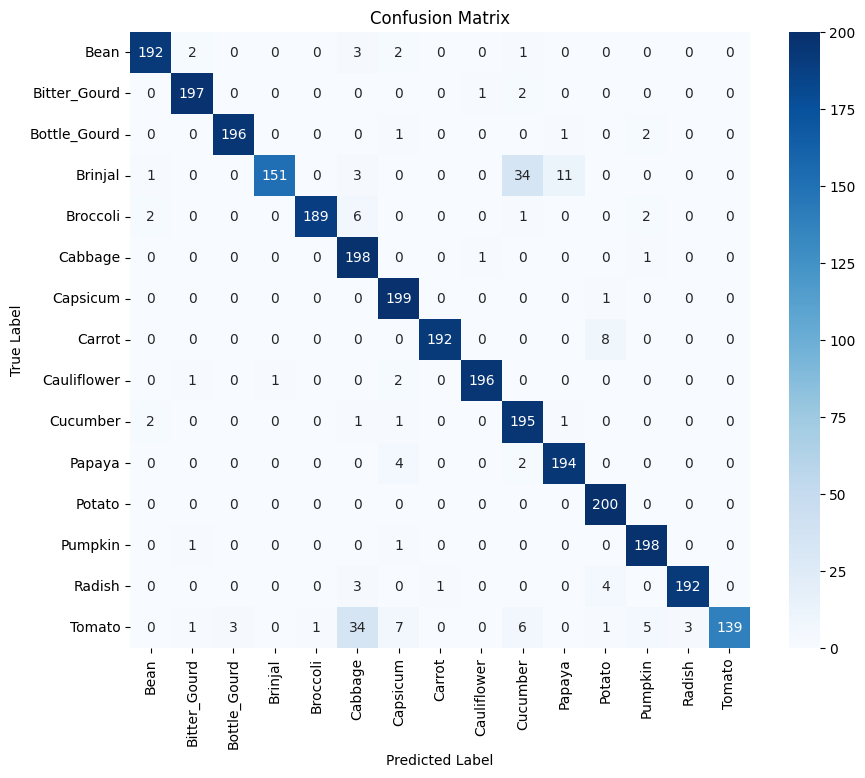

In [ ]:
plot_confusion_matrix(resnet_model, test_ds, class_names)

#**Resnet50 using PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# Define the PyTorch dataset
class VegetableDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.class_names = sorted(os.listdir(data_dir))
        self.image_paths = []
        self.labels = []
        for i, class_name in enumerate(self.class_names):
            class_path = os.path.join(data_dir, class_name)
            for img_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, img_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = VegetableDataset(train_dir, transform=transform)
val_dataset = VegetableDataset(os.path.join(base_dir, 'validation'), transform=transform)
test_dataset = VegetableDataset(os.path.join(base_dir, 'test'), transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Build ResNet50 model
resnet50_pytorch = models.resnet50(pretrained=True)
num_ftrs = resnet50_pytorch.fc.in_features
resnet50_pytorch.fc = nn.Linear(num_ftrs, Veggies_count)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet50_pytorch.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50_pytorch.to(device)

# Training loop with validation evaluation
num_epochs = 10

for epoch in range(num_epochs):
    resnet50_pytorch.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet50_pytorch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataset)

    # Evaluate on validation set
    resnet50_pytorch.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet50_pytorch(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_dataset)
    epoch_val_accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")

print("Training finished.")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.4744, Val Loss: 0.0884, Val Accuracy: 97.60%
Epoch 2/10, Train Loss: 0.1599, Val Loss: 0.0853, Val Accuracy: 97.10%
Epoch 3/10, Train Loss: 0.0864, Val Loss: 0.0770, Val Accuracy: 97.30%
Epoch 4/10, Train Loss: 0.0772, Val Loss: 0.0456, Val Accuracy: 98.73%
Epoch 5/10, Train Loss: 0.0546, Val Loss: 0.0809, Val Accuracy: 97.70%
Epoch 6/10, Train Loss: 0.0797, Val Loss: 0.1283, Val Accuracy: 95.70%
Epoch 7/10, Train Loss: 0.0449, Val Loss: 0.0408, Val Accuracy: 98.77%
Epoch 8/10, Train Loss: 0.0355, Val Loss: 0.0648, Val Accuracy: 97.77%
Epoch 9/10, Train Loss: 0.0442, Val Loss: 0.1131, Val Accuracy: 96.90%
Epoch 10/10, Train Loss: 0.0346, Val Loss: 0.0397, Val Accuracy: 99.13%
Training finished.


In [ ]:
# Evaluate the PyTorch model on the test set
resnet50_pytorch.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet50_pytorch(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

pytorch_test_accuracy = 100 * correct / total
print(f"PyTorch ResNet50 Test Accuracy: {pytorch_test_accuracy:.2f}%")

PyTorch ResNet50 Test Accuracy: 99.63%
